<a href="https://colab.research.google.com/github/kp0007/MSAI_kp35262/blob/main/kp35262_Self_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In This Tutorial , We will learn,
- Healthcare Data-loading
- Data Analysis
- Data Visualization and plotting using matplotlib
- Feature Engineering (Categorical & Numerical)
- Machine Learning Modeling using scikit-learn
- Applying three types of Machine Learning Algo to Healthcare dataset
-Evaluating Model Performance
-Comparing Results Generated by all Three Alogs.

# ***Load All Necessary Librearies***

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,RocCurveDisplay,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files

# ***Load Dataset***

In [56]:
#Data set link : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
#Acknowledgements
#Creators:

#Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
#University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
#University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
#V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#Donor:
#David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

d1 = files.upload()
h1 = pd.read_csv('heart.csv')

Saving heart.csv to heart (2).csv


# ***Data Analysis and Plotting***

In [57]:
h1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [58]:
h1.shape

(918, 12)

In [59]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


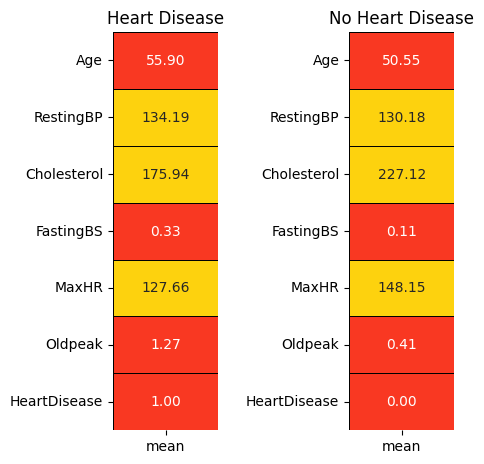

In [60]:
yes = h1[h1['HeartDisease'] == 1].describe().T
no = h1[h1['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

# ***Feature Engineering***



***Here We are Dividing Features into Numerical and Categorial***

In [61]:
#Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
#Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
#Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

col = list(h1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(h1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)



Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


***Categorical Features***

In [62]:
#Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
#Modifications in the original dataset will not be highlighted in this deep copy.
#Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

le = LabelEncoder()
df1 = h1.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])



***Distribution of Categorical Features***

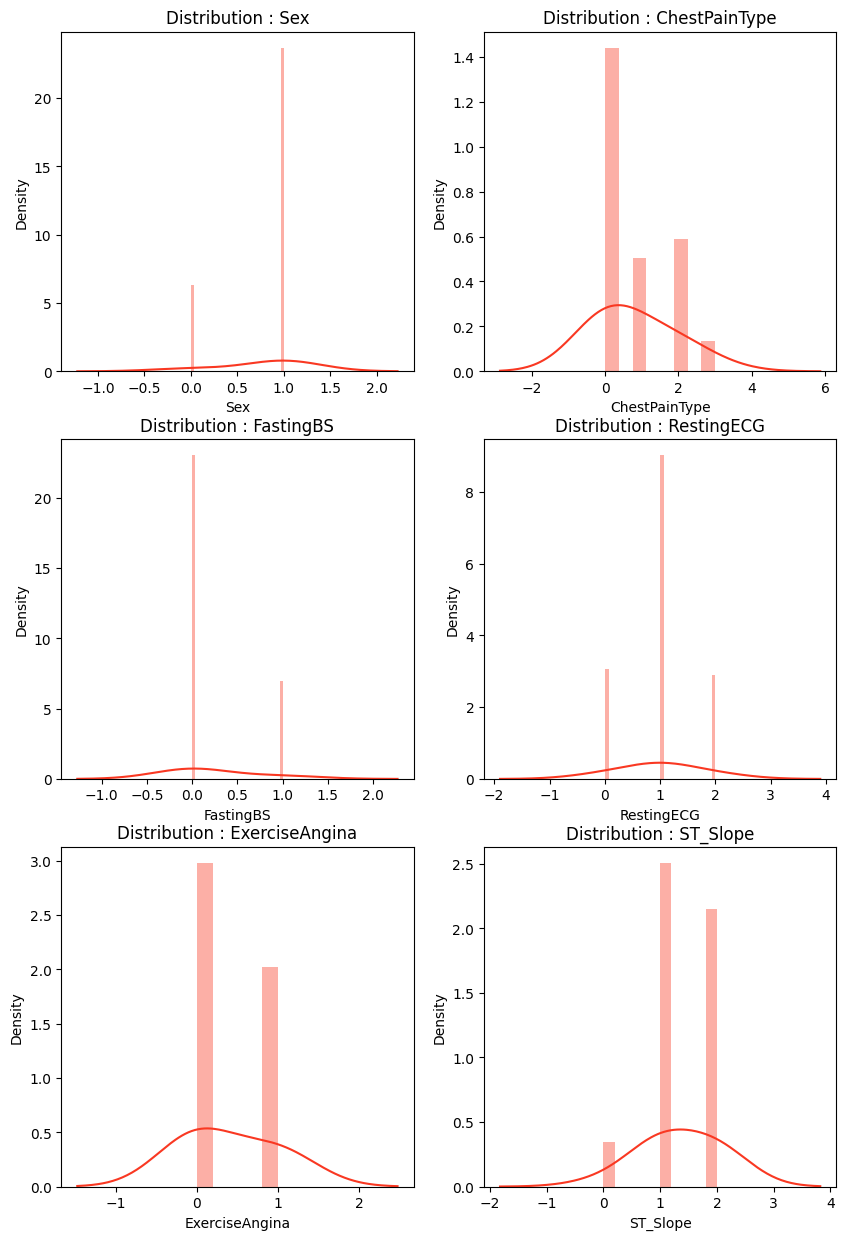

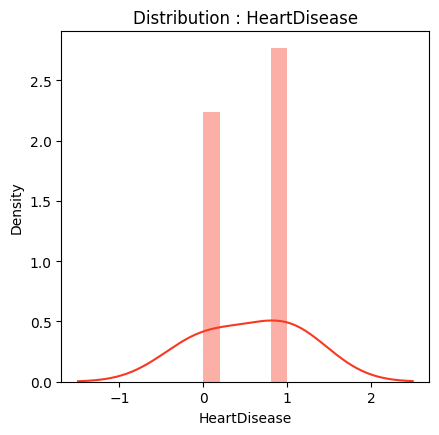

In [63]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

***Distribution of Numerical Features***

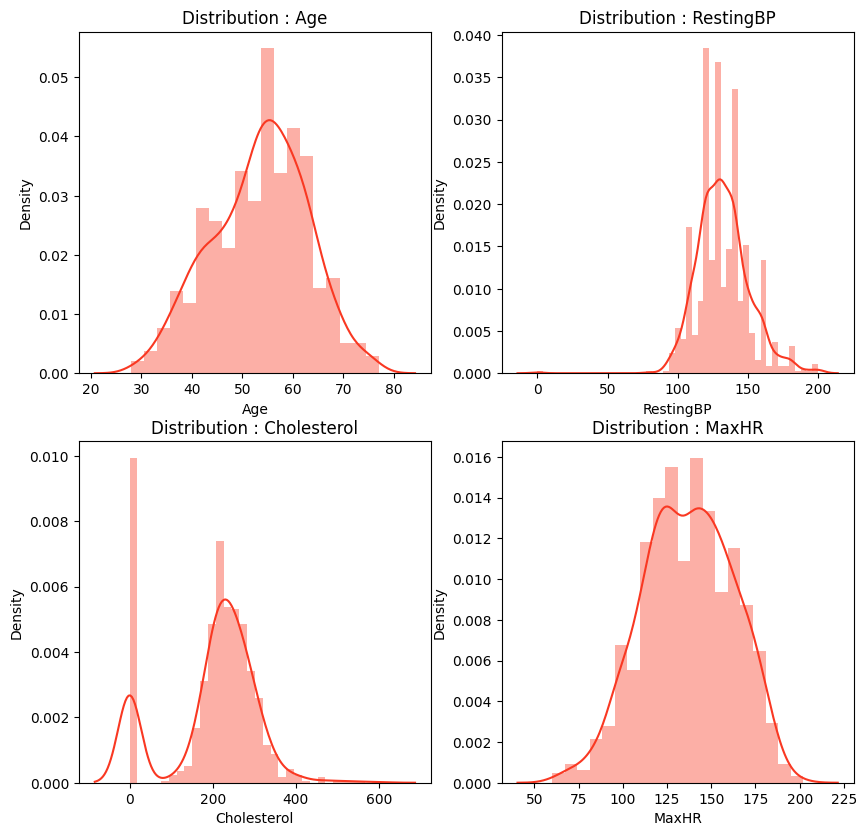

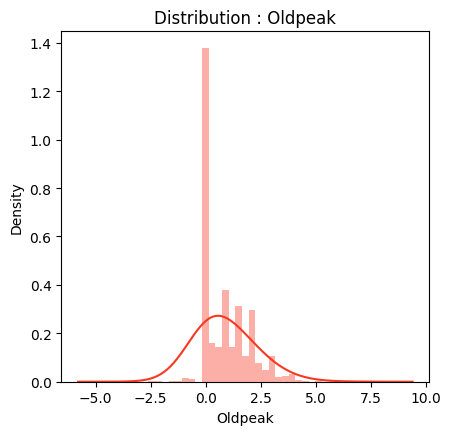

In [64]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(h1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

# ***Machine Learning Modeling***


In [65]:
#we will apply three machine learning algorithms to this dataset
# Selecting the features from the above and splitting the data into 80 - 20 train - test groups.

features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [66]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# ***(1) Logistic Regression***

In [67]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Accuracy :  85.33%
Cross Validation Score :  91.04%
ROC_AUC Score :  85.22%


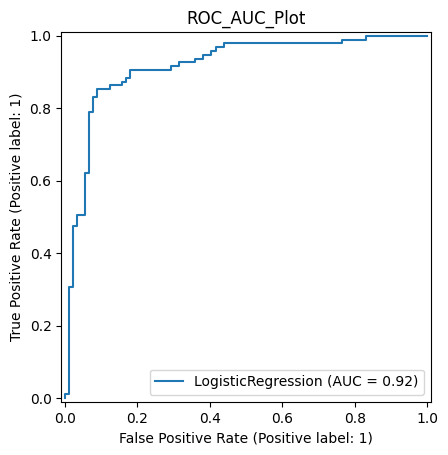

In [68]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



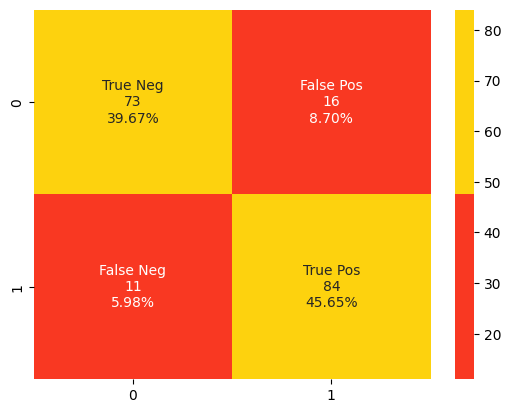

In [69]:
#Let's Evaluate model performance
model_evaluation(classifier_lr)

# ***(2) K-nearest Neighbors Classifier***

In [70]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  73.37%
Cross Validation Score :  77.92%
ROC_AUC Score :  73.18%


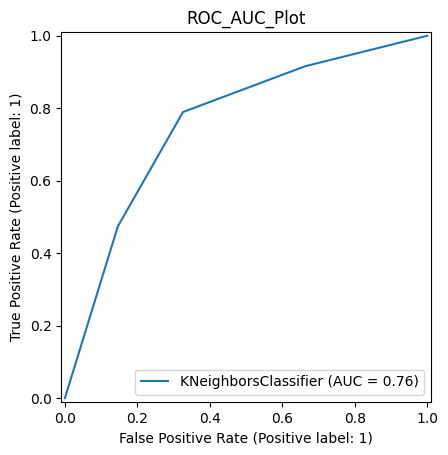

In [71]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        89
           1       0.72      0.79      0.75        95

    accuracy                           0.73       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



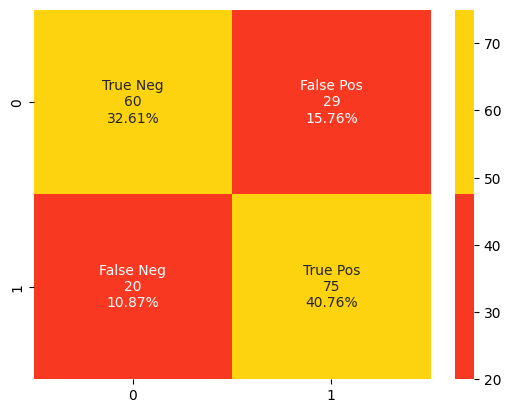

In [46]:
model_evaluation(classifier_knn)

# ***(3) Decision Tree Classifier***

In [73]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


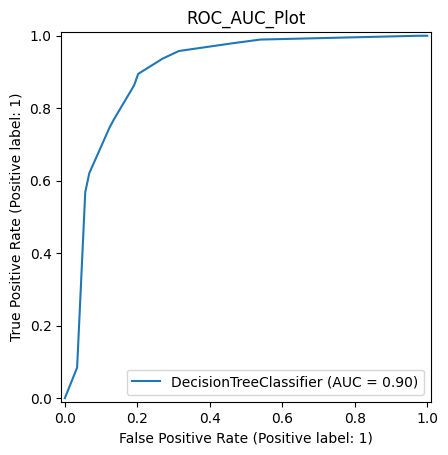

In [74]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



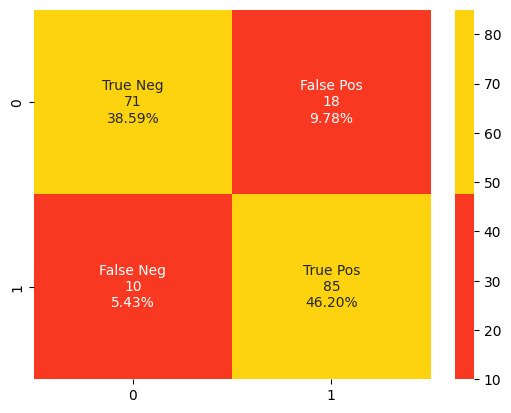

In [75]:
model_evaluation(classifier_dt)